## I. Data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
#Two data sources are imported
filepath1 = 'data/Data1.csv'
data_orig1 = pd.read_csv(filepath1)
filepath2 = 'data/Data2.csv'
data_orig2 = pd.read_csv(filepath2)

## II. Data cleaning

In [3]:
#Drop columns 'Country Code', 'Series Code' and '2019[YR2019]'
data_orig1=data_orig1.drop(['Country Code','Series Code'],axis=1)
data_orig2=data_orig2.drop(['Country Code','Series Code','2019 [YR2019]'],axis=1)

In [4]:
data_orig1.columns

Index(['Country Name', 'Series Name', '1960 [YR1960]', '1965 [YR1965]',
       '1970 [YR1970]', '1975 [YR1975]', '1980 [YR1980]', '1985 [YR1985]',
       '1990 [YR1990]', '1995 [YR1995]', '2000 [YR2000]', '2005 [YR2005]',
       '2010 [YR2010]', '2015 [YR2015]', 'last_av'],
      dtype='object')

In [5]:
data_orig2.columns

Index(['Country Name', 'Series Name', '1960 [YR1960]', '1965 [YR1965]',
       '1970 [YR1970]', '1975 [YR1975]', '1980 [YR1980]', '1985 [YR1985]',
       '1990 [YR1990]', '1995 [YR1995]', '2000 [YR2000]', '2005 [YR2005]',
       '2010 [YR2010]', '2015 [YR2015]', 'last_av'],
      dtype='object')

In [6]:
#Merge two tables from different databases
data_orig=pd.concat([data_orig1,data_orig2],ignore_index=True)

In [7]:
#Convert missing values to NaN
data_orig=data_orig.replace('..',np.nan)

In [8]:
data_orig

,Country Name,Series Name,1960 [YR1960],1965 [YR1965],1970 [YR1970],1975 [YR1975],1980 [YR1980],1985 [YR1985],1990 [YR1990],1995 [YR1995],2000 [YR2000],2005 [YR2005],2010 [YR2010],2015 [YR2015],last_av
0,Belarus,"Access to anti-retroviral drugs, female (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,21,37,65
1,Belarus,"Access to anti-retroviral drugs, male (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,20,31,62
2,Belarus,"Age at first marriage, female",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.7,NaN,NaN,22.5
3,Belarus,"Age at first marriage, male",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.8
4,Belarus,"Birth rate, crude (per 1,000 people)",23.455,19.09,15.976,15.642,16.177,16.5,14,9.9,9.4,9.3,11.4,12.5,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Rename columns
data_orig.rename(columns={'Country Name':'Country','Series Name':'Indicator','1960 [YR1960]':'1960', '1965 [YR1965]':'1965',
       '1970 [YR1970]':'1970', '1975 [YR1975]':'1975', '1980 [YR1980]':'1980', '1985 [YR1985]':'1985',
       '1990 [YR1990]':'1990', '1995 [YR1995]':'1995', '2000 [YR2000]':'2000', '2005 [YR2005]':'2005',
       '2010 [YR2010]':'2010', '2015 [YR2015]':'2015', 'last_av':'Last available'},inplace=True)

In [10]:
#Only rows with not-null values in column 'Indicator' are taken for future analysis (last 5 rows from each primary table should be removed, because contains some metadata)
data_orig = data_orig[data_orig['Indicator'].notna()]

In [11]:
#Reshape DataFrame
data=pd.melt(frame=data_orig,id_vars=['Country','Indicator'],
        var_name='Year', value_name='Value')
data.head(10)

,Country,Indicator,Year,Value
0,Belarus,"Access to anti-retroviral drugs, female (%)",1960,NaN
1,Belarus,"Access to anti-retroviral drugs, male (%)",1960,NaN
2,Belarus,"Age at first marriage, female",1960,NaN
3,Belarus,"Age at first marriage, male",1960,NaN
4,Belarus,"Birth rate, crude (per 1,000 people)",1960,23.455
5,Belarus,"Death rate, crude (per 1,000 people)",1960,9.918
6,Belarus,"Fertility rate, total (births per woman)",1960,2.67
7,Belarus,Length of paid parental leave for father (days),1960,NaN
8,Belarus,Length of paid parental leave for mother (days),1960,NaN
9,Belarus,Length of paid paternity leave (days),1960,NaN


In [12]:
#Convert column 'Value' type from string to float
data['Value'] = data['Value'].astype(float)

In [13]:
#Rounding values to 1 decimal
data['Value'] = np.round(data['Value'],decimals=1)

In [14]:
#Extract data with population size and structure
population_orig = data[((data.Indicator== 'Population, total') | (data.Indicator =='Population, male (% of total population)') | (data.Indicator == 'Population, female (% of total population)')) & (data.Year=='Last available') & ((data.Country != 'Low income') & (data.Country != 'Middle income') & (data.Country != 'High income'))]
population_orig=population_orig.drop(['Year'],axis=1)

In [ ]:
#Reshape population table
population = population_orig.pivot(index='Country',columns='Indicator',values='Value')
population['Population, total'] = population['Population, total'].astype(int)

In [ ]:
#Extract data with Life expectancy at birth, birth rate, death rate, fertility rate
LE_b = data[data.Indicator=='Life expectancy at birth, total (years)']
birth_rate = data[data.Indicator=='Birth rate, crude (per 1,000 people)']
death_rate = data[data.Indicator=='Death rate, crude (per 1,000 people)']
fertility = data[data.Indicator=='Fertility rate, total (births per woman)']

## III. How do Lithuania look among other countries by general indicators?

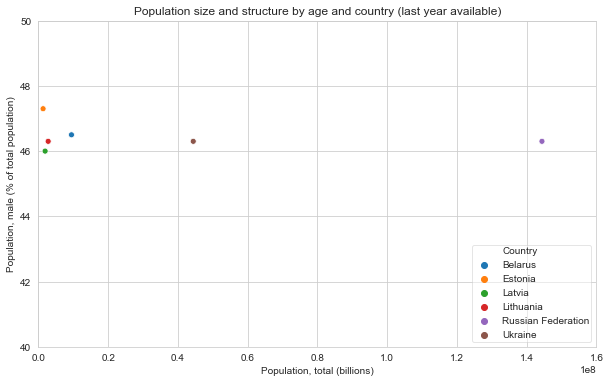

In [98]:
# Population size and structure
plt.figure(figsize=(10,6))
sns.scatterplot(x='Population, total', 
                y='Population, male (% of total population)',
                hue=population.index, data=population)
plt.title("Population size and structure by age and country (last year available)")
plt.xlabel('Population, total (billions)')
plt.ylim(bottom=40,top=50)
plt.xlim(left=0,right=160000000)
plt.legend(loc=4,ncol=1,framealpha=0.5,borderpad=0.2)

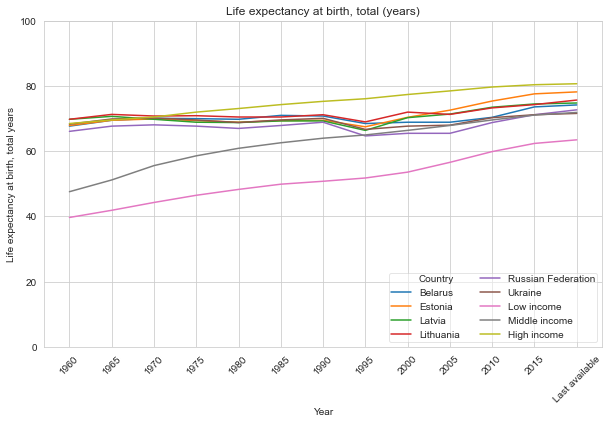

In [17]:
#Life expectancy
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year',y='Value',hue='Country',data=LE_b,ax=ax)
plt.title("Life expectancy at birth, total (years)")
plt.ylabel('Life expectancy at birth, total years')
plt.xticks(rotation=45)
plt.ylim(bottom=0,top=100)
plt.legend(loc=4,ncol=2,framealpha=0.5,borderpad=0.2)

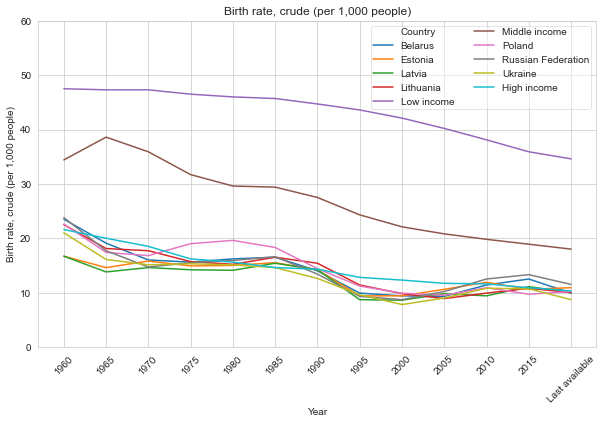

In [18]:
#Birth rate
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year',y='Value',hue='Country',data=birth_rate,ax=ax)
plt.title("Birth rate, crude (per 1,000 people)")
plt.ylabel('Birth rate, crude (per 1,000 people)')
plt.xticks(rotation=45)
plt.ylim(bottom=0,top=60)
plt.legend(loc=0,ncol=2,framealpha=0.5,borderpad=0.2)

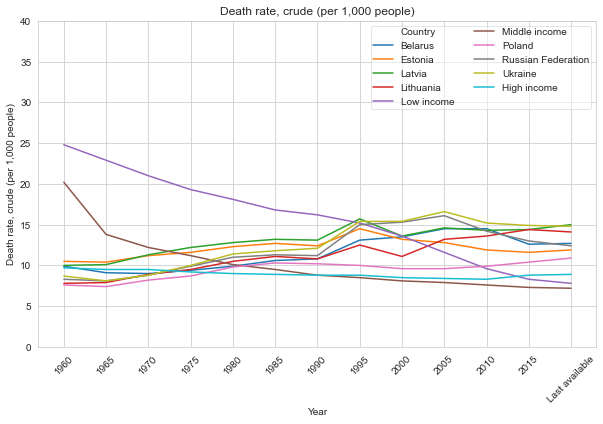

In [19]:
#Death rate
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year',y='Value',hue='Country',data=death_rate,ax=ax)
plt.title("Death rate, crude (per 1,000 people)")
plt.ylabel('Death rate, crude (per 1,000 people)')
plt.xticks(rotation=45)
plt.ylim(bottom=0,top=40)
plt.legend(loc=0,ncol=2,framealpha=0.5,borderpad=0.2)

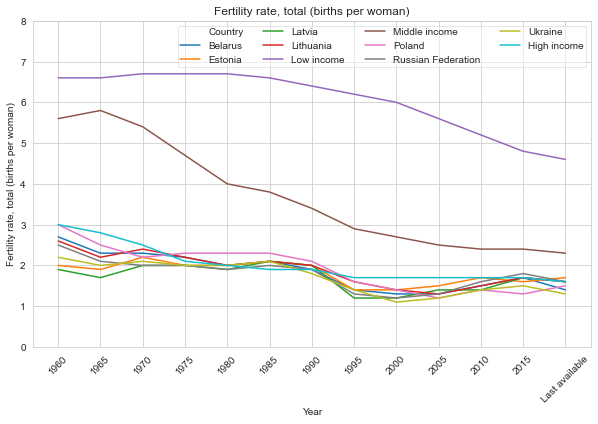

In [20]:
#Fertility
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year',y='Value',hue='Country',data=fertility,ax=ax)
plt.title("Fertility rate, total (births per woman)")
plt.ylabel('Fertility rate, total (births per woman)')
plt.xticks(rotation=45)
plt.ylim(bottom=0,top=8)
plt.legend(loc=0,ncol=4,framealpha=0.5,borderpad=0.2)

## IV. What are the differences between men and woman in various countries?

## V. How did differences between men and woman in Lithuania changed through years?